In [ ]:
#키워드를 추출한 데이터와 본 ipynb파일은 같은 디렉토리에 있어야 함

# data load

In [21]:
import os

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

from collections import Counter
from itertools import islice

In [2]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'NanumGothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [3]:
df_1 = pd.read_csv("./keyword/1st_period_rep.csv")
df_2 = pd.read_csv("./keyword/2nd_period_rep.csv")
df_3 = pd.read_csv("./keyword/3rd_period_rep.csv")

## 함수 정의
* common(): keyword 중에서 top10까지만 추출
* to_dataframe(): 시기 / top10의 키워드 / 해당 키워드가 언급된 빈도를 column값으로 하는 dataframe 반환

In [4]:
def common(df):
    represent = list(df["Keyword"])
    count = Counter(represent)
    return count.most_common(10)

In [5]:
def to_dataframe(most_freq, num):
    period = "period_" + str(num)
    df = pd.DataFrame({'period': [period for i in range(len(most_freq))],
                       'keywords': [v[0] for v in most_freq],
                       'size': [v[1] for v in most_freq]})
    return df

In [6]:
most_freq_1 = common(df_1)
most_freq_2 = common(df_2)
most_freq_3 = common(df_3)

In [7]:
print(most_freq_1)

[('확진자', 891), ('친서', 891), ('대구', 594), ('대통령', 594), ('확진', 495), ('신천지', 495), ('환자', 495), ('물가', 396), ('우한', 396), ('대응', 396)]


In [8]:
print(most_freq_2)

[('확진자', 1194), ('백신', 1088), ('확진', 901), ('목사', 888), ('방한', 783), ('훈련', 694), ('검사', 595), ('병원', 589), ('대통령', 505), ('교회', 499)]


In [9]:
print(most_freq_3)

[('백신', 7433), ('구치소', 1579), ('변종', 1577), ('영국', 1289), ('접종', 1287), ('대통령', 1193), ('확진자', 1009), ('치료', 991), ('검사', 988), ('동부', 986)]


In [10]:
df1 = to_dataframe(most_freq_1, 1)
df2 = to_dataframe(most_freq_2, 2)
df3 = to_dataframe(most_freq_3, 3)

In [11]:
df1.head()

,period,keywords,size
0,period_1,확진자,891
1,period_1,친서,891
2,period_1,대구,594
3,period_1,대통령,594
4,period_1,확진,495


In [12]:
df2.head()

,period,keywords,size
0,period_2,확진자,1194
1,period_2,백신,1088
2,period_2,확진,901
3,period_2,목사,888
4,period_2,방한,783


In [13]:
df3.head()

,period,keywords,size
0,period_3,백신,7433
1,period_3,구치소,1579
2,period_3,변종,1577
3,period_3,영국,1289
4,period_3,접종,1287


In [14]:
df_concat = pd.concat([df1, df2, df3])
df_concat

,period,keywords,size
0,period_1,확진자,891
1,period_1,친서,891
2,period_1,대구,594
3,period_1,대통령,594
4,period_1,확진,495
5,period_1,신천지,495
6,period_1,환자,495
7,period_1,물가,396
8,period_1,우한,396
9,period_1,대응,396


# visualization

각 period 별 top10 keyword 언급 빈도를 한눈에 볼수 있도록 정리
1. 언급된 절댓값으로만 비교 -> 각 시기, 각 날짜별로 크롤링 된 기사의 수가 다르다는 것을 감안하면 비교대상으로 부적합할 수도 있음

2. 언급된 비율로 비교 -> (해당 단어가 언급된 수 % 기사 수)를 adj_size로 할당해, 특정 단어가 해당 날짜에 언급된 모든 keyword 중에 몇 퍼센트의 비율을 차지하는 지 계산

---------

2의 방법이 논리적인 scaling이라고 볼 수 있음

이때 모든 시기 중 '백신'이라는 단어가 압도적으로 많이 언급된 것을 볼 수 있고,

코로나 초반의 1차 유행에서는 top10에 들지 못했다가 2차 유행 때는 2위, 3차 유행 때는 1위로 빈도수가 차차 늘어간 것으로 보아

**코로나 전후 변화를 대표하는 keyword로 선정하게 됨**

In [15]:
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = [18, 5]

In [16]:
period = list(df_concat['period'])

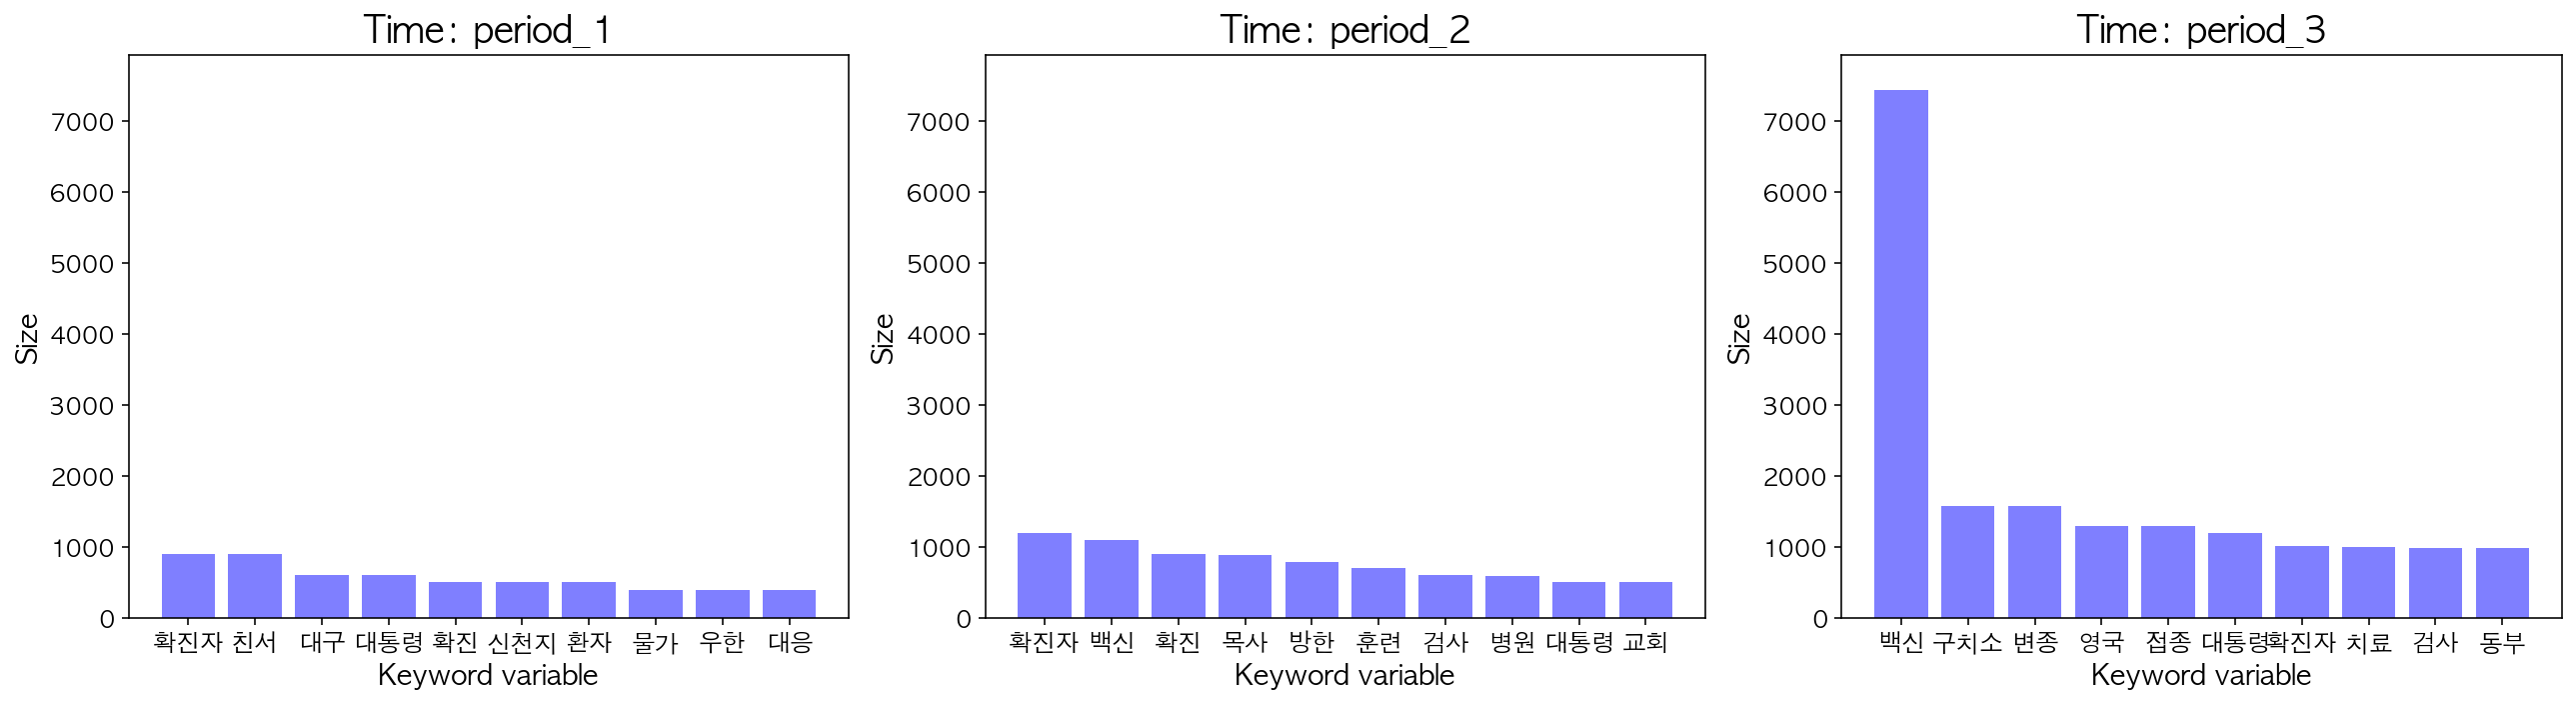

In [22]:
max_val = np.ceil(max(df_concat['size']))

for i, period in enumerate(['period_1', 'period_2', 'period_3']):
    df_i = df_concat[df_concat['period'] == period]
    plt.subplot(1, 3, i+1)
    plt.bar(df_i['keywords'], df_i['size'], color='blue', alpha=0.5)
    plt.title('Time: %s' %period, fontsize=18)
    plt.xlabel('Keyword variable', fontsize=14)
    plt.ylabel('Size', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # set fixed y axis scale
    plt.ylim(0, max_val+500)
    plt.tight_layout()

In [23]:
size = list(df_concat['size'])

In [24]:
# 비율 구하기
for i, v in enumerate(size):
    size[i] = v / df_1.shape[0]
    if i > 9 and i < 20:
        size[i] = v / df_2.shape[0]
    if i >= 20:
        size[i] = v / df_3.shape[0]

In [25]:
size

[0.07563025210084033,
 0.07563025210084033,
 0.05042016806722689,
 0.05042016806722689,
 0.04201680672268908,
 0.04201680672268908,
 0.04201680672268908,
 0.03361344537815126,
 0.03361344537815126,
 0.03361344537815126,
 0.04269012120562051,
 0.03890021094783511,
 0.03221423719117594,
 0.03174943687654189,
 0.027995280489112945,
 0.024813186027387465,
 0.021273552862097322,
 0.021059029639958527,
 0.018055704530015374,
 0.017841181307876576,
 0.15940723584035685,
 0.03386304660190011,
 0.03382015483926312,
 0.027643741019537198,
 0.027600849256900213,
 0.02558493641296189,
 0.021638894250359218,
 0.02125286838662635,
 0.02118853074267087,
 0.021145638980033885]

In [26]:
df_concat['adj_size'] = size
df_concat

,period,keywords,size,adj_size
0,period_1,확진자,891,0.075630
1,period_1,친서,891,0.075630
2,period_1,대구,594,0.050420
3,period_1,대통령,594,0.050420
4,period_1,확진,495,0.042017
5,period_1,신천지,495,0.042017
6,period_1,환자,495,0.042017
7,period_1,물가,396,0.033613
8,period_1,우한,396,0.033613
9,period_1,대응,396,0.033613


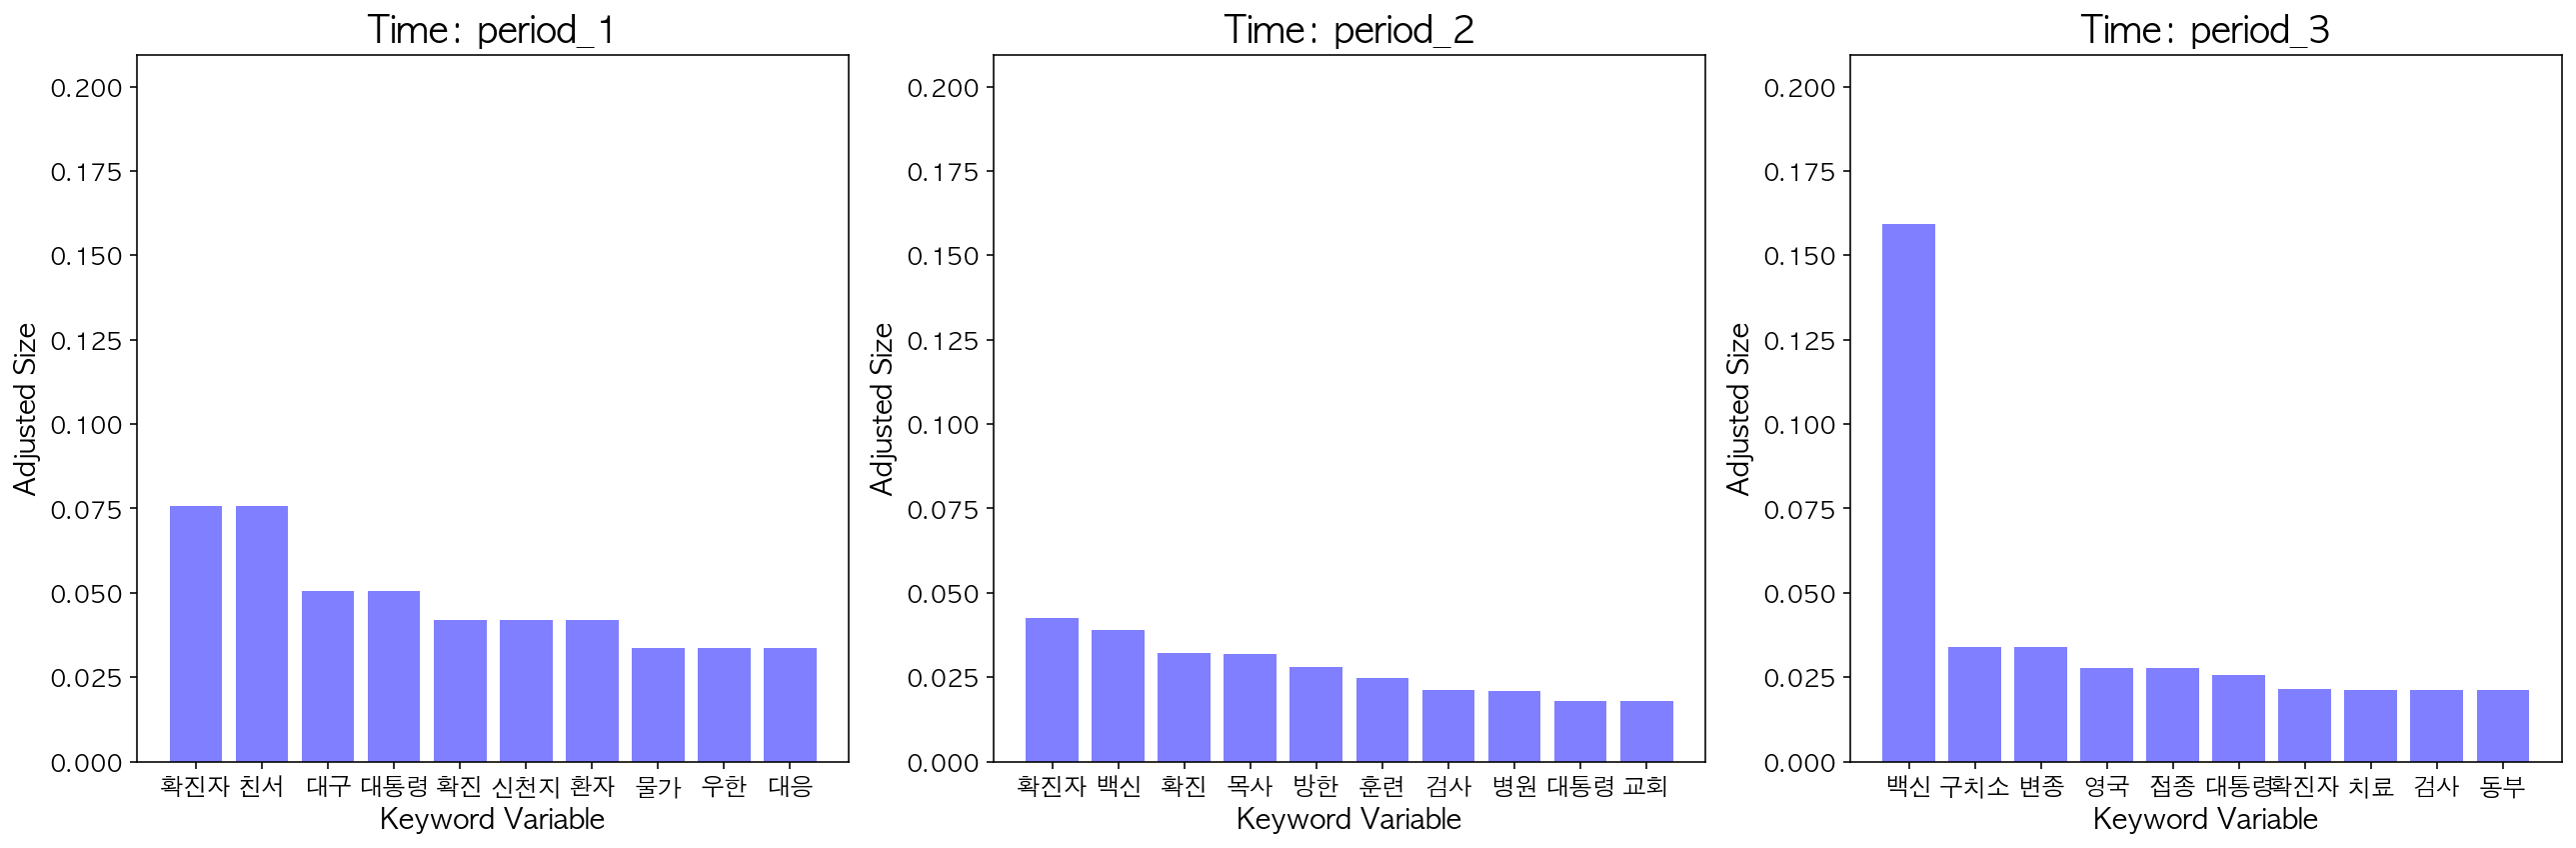

In [27]:
plt.rcParams['figure.figsize'] = [18, 6]
max_val = max(df_concat['adj_size'])

for i, period in enumerate(['period_1', 'period_2', 'period_3']):
    df_i = df_concat[df_concat['period'] == period]
    plt.subplot(1, 3, i+1)
    plt.bar(df_i['keywords'], df_i['adj_size'], color='blue', alpha=0.5)
    plt.title('Time: %s' %period, fontsize=18)
    plt.xlabel('Keyword Variable', fontsize=14)
    plt.ylabel('Adjusted Size', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # set fixed y axis scale
    plt.ylim(0, max_val + 0.05)
    plt.tight_layout()